### **Method Implementation**

#### Implementing the EM Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from skimage import io
from sklearn.cluster import KMeans

def EMG(path, k):
    # Load image and convert to 2D matrix
    image = io.imread(path)
    n, M, d = image.shape
    X = np.reshape(image, (n*M, d))
    assert X.shape == (n*M, d), "Error: Reshaped matrix has incorrect size."

    # Initialize means and covariances using k-means
    kmeans = KMeans(n_clusters=k, max_iter=3).fit(X)
    m = kmeans.cluster_centers_
    cov = np.zeros((k, d, d))
    for j in range(k):
        members = X[kmeans.labels_ == j]
        cov[j] = np.cov(members.T)

    # Initialize mixture coefficients
    pi = np.ones(k) / k

    # Initialize responsibility matrix
    h = np.zeros([n*M, k])

    # Running EM algorithm
    Q = []
    for iter in range(100):
        # E-step
        for i in range(n*M):
            for j in range(k):
                h[i, j] = pi[j] * multivariate_normal.pdf(X[i], m[j], cov[j])
            h[i, :] /= np.sum(h[i, :])
        Q.append(np.sum(np.log(np.sum(h * pi, axis=1))))

        # M-step
        for j in range(k):
            Nj = np.sum(h[:, j])
            m[j] = np.sum(h[:, j, np.newaxis] * X, axis=0) / Nj
            cov[j] = np.dot((h[:, j, np.newaxis] * (X - m[j])).T, (X - m[j])) / Nj
            # In case of singular covariance matrix(program fails)
            if np.linalg.det(cov[j]) == 0:
                print(f'Cov matrix singluar for iteration {iter}')
                break
            pi[j] = Nj / (n*M)

        # Check for convergence
        if iter > 0 and np.abs(Q[iter] - Q[iter-1]) < 1e-6:
            break

    # Create compressed image
    compressed_image = np.zeros((n*M, d))
    for j in range(k):
        members = X[np.argmax(h, axis=1) == j]
        compressed_image[np.argmax(h, axis=1) == j] = np.mean(members, axis=0)
    compressed_image = np.reshape(compressed_image, (n, M, d))

    # Display the compressed image
    plt.imshow(compressed_image.astype('uint8'))
    plt.axis('off')
    plt.show()
    return h, m, Q


#### Running for various values of k

Running EM algorithm with k = 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


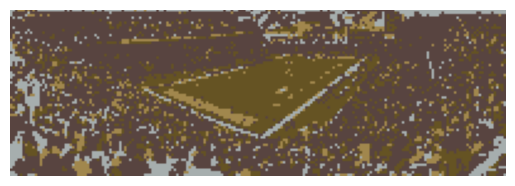

Running EM algorithm with k = 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


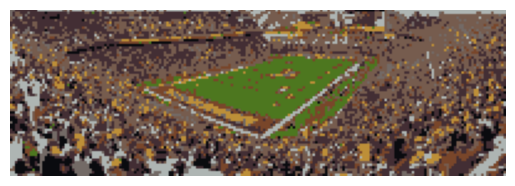

Running EM algorithm with k = 12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


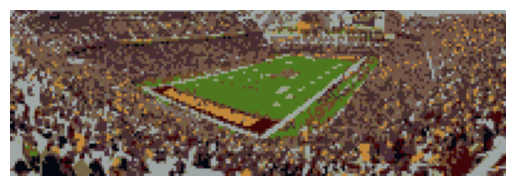

In [ ]:
# Call the EMG function for k = 4, 8, 12
Q_list = []
for k in [4, 8, 12]:
    print(f"EM algoorithm for k value: {k}")
    h, m, Q = EMG("stadium.png", k)
    Q_list.append(Q)

### **Plotting Expected Likelihood**

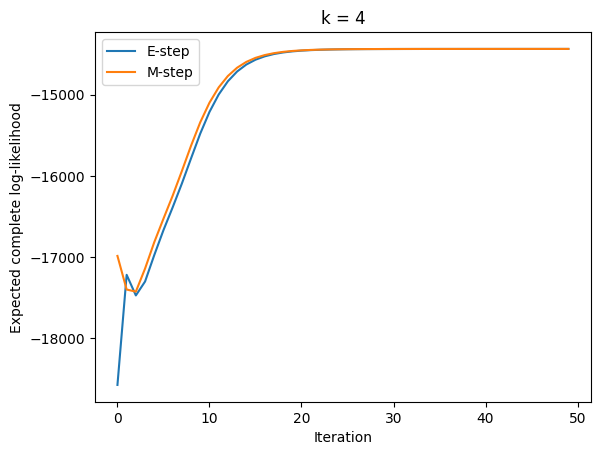

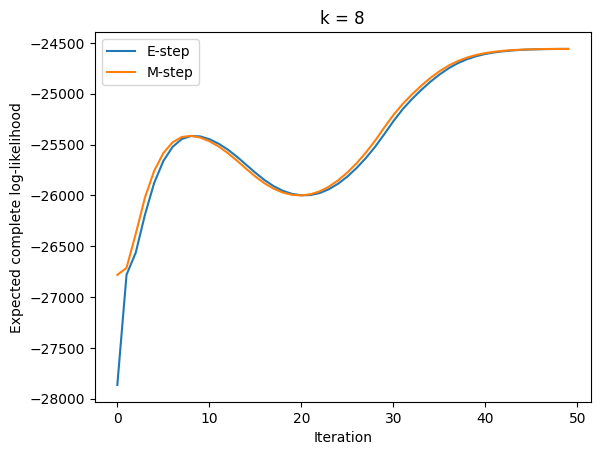

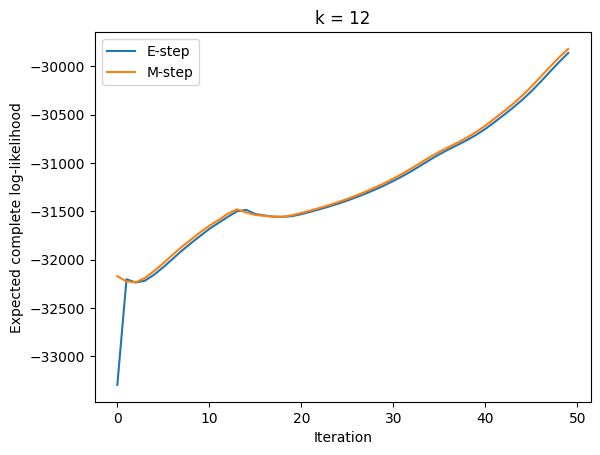

In [ ]:
ks = [4,8,12]
for i in range(len(Qs)):
    # Plot expected complete log-likelihood vs iteration number
    # Plot expected complete log-likelihood
    Q = Q_list[i]
    plt.figure()
    plt.plot(Q[::2], label='E-step')
    plt.plot(Q[1::2], label='M-step')
    plt.xlabel('Iteration')
    plt.ylabel('Expected complete log-likelihood')
    plt.title(f'k = {ks[i]}')
    plt.legend()